In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adadelta
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, MaxPool2D, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

2022-06-06 19:18:20.382859: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-06 19:18:20.382917: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import cv2
import os

In [3]:
img = image.load_img("faces/train/anger/google_003.jpg")

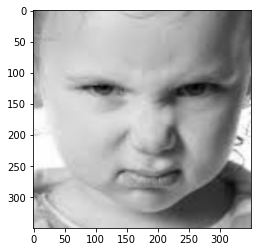

In [4]:
plt.imshow(img)

In [5]:
 cv2.imread("faces/train/anger/google_003.jpg").shape

(350, 350, 3)

In [6]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
validate = ImageDataGenerator(rescale=1/255)

In [7]:
train_ds = train.flow_from_directory('faces/train/', 
                                     target_size=(350,350), 
                                     batch_size=3, 
                                     class_mode='categorical')

validate_ds = validate.flow_from_directory('faces/validate/', 
                                     target_size=(350,350), 
                                     batch_size=3, 
                                     class_mode='categorical')

Found 352 images belonging to 9 classes.
Found 352 images belonging to 9 classes.


In [8]:
train_ds.class_indices

{'anger': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'joy': 4,
 'kiss': 5,
 'neutral': 6,
 'sadness': 7,
 'surprise': 8}

In [13]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', input_shape = (350,350,3)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9,activation='softmax'))


2022-06-06 19:37:10.616052: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 490356736 exceeds 10% of free system memory.
2022-06-06 19:37:10.827190: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 490356736 exceeds 10% of free system memory.
2022-06-06 19:37:10.907806: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 490356736 exceeds 10% of free system memory.


In [14]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy, optimizer=Adadelta(), 
    metrics=['accuracy'])

In [ ]:
model.fit(
   train_ds, 
   batch_size = 32, 
   epochs = 10, 
   validation_data = (validate_ds)
)

Epoch 1/10


2022-06-06 19:37:25.919848: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 490356736 exceeds 10% of free system memory.
2022-06-06 19:37:25.972708: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 490356736 exceeds 10% of free system memory.


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 348, 348, 16)      448       
                                                                 
 conv2d_3 (Conv2D)           (None, 346, 346, 32)      4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 173, 173, 32)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 957728)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               122589312 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      